In [1]:
# ! pip install -q kaggle
# from google.colab import files 
# files.upload()

In [2]:
# ! mkdir ~/.kaggle 
# ! cp kaggle.json ~/.kaggle/

In [3]:
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets download -d shubhamgoel27/dermnet

In [4]:
# %%capture
# !unzip dermnet.zip -d "Dataset"

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import plotly.express as px

import pathlib
import glob
import random

In [6]:
train_dir = pathlib.Path("/kaggle/input/dataset-dermenet-cropped/train")
test_dir = pathlib.Path("/kaggle/input/dataset-dermenet-cropped/val")

In [7]:
image_count = len(list(train_dir.glob('*/*.jpg')))
print(image_count)

8367


In [8]:
import os
train_folders = os.listdir("/kaggle/input/dataset-dermenet-cropped/val")
test_folders = os.listdir("/kaggle/input/dataset-dermenet-cropped/val")

In [9]:
def plot_img_count():
    # Lets check the count of images in each folder
    plot = {"Disease":[],"Count":[]}
    for each_folder in train_folders:
        plot["Disease"].append(each_folder if len(each_folder) < 20 else each_folder[:20])
        plot["Count"].append(len(os.listdir(f"/kaggle/input/dataset-dermenet-cropped/train/{each_folder}")))
    df = pd.DataFrame(plot)
    df.sort_values(by=['Count'], inplace=True, ascending=False)
    fig = px.bar(df, x="Disease", y="Count",color="Disease",title="Disease Images Count Number")
    fig.update_xaxes(tickangle=60)
    fig.update_layout(
    height=400,
    title=dict(
        x=0.5,
        y=0.95,
        font=dict(
            family="Arial",
            size=20,
            color='#000000'
        )
    ),
    font=dict(
        family="Courier New, Monospace",
        size=8,
        color='#000000'
    )
)
    fig.show()

In [10]:
plot_img_count()

In [11]:
# # Some random images of the Acne
# acne = list(train_dir.glob('Acne and Rosacea Photos/*'))
# PIL.Image.open(str(acne[0]))

In [12]:
# PIL.Image.open(str(acne[1]))

#### Generating new Images
It's obvious from the above bar plot that the distribution of images are very un even so I have to do something.Options that I have


1.   OverSampling
2.   UnderSampling: Bad Idea since we have less training data and we are reducing it further
3.   Data Augmentation

Out of above three options I will be doing image augmentation to handle the imbalance



In [13]:
# from keras.preprocessing.image import ImageDataGenerator
# from keras.utils import load_img, img_to_array

# datagen = ImageDataGenerator(
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')

In [14]:
# def image_generation(path, img_name):
#     img = load_img(path+f"/{img_name}") 
#     x = img_to_array(img)  
#     x = x.reshape((1,) + x.shape) 

#     i = 0
#     for batch in datagen.flow(x, batch_size=1,save_to_dir=path, save_prefix='augment', save_format='jpeg'):
#         i += 1
#         if i > 20:
#             break  

In [15]:
# train_path = os.path.join("Dataset", "train")
# for i in os.listdir(train_path):
#     pre_img = os.listdir(os.path.join(train_path, i))
#     used_img = []
#     l = len(pre_img)
#     print("Class", i, "done")
#     while l < 1000:
#         random_img = random.choice(pre_img)
#         while random_img in used_img:
#             random_img = random.choice(pre_img)
#         used_img.append(random_img)
#         image_generation(os.path.join(train_path, i), random_img)
#         l += 20

In [16]:
# plot_img_count()

In [17]:
# # !cp -r Dataset drive/MyDrive/Dataset
# !cp -r /content/drive/MyDrive/Dataset/Augmented_Dataset.zip ./
# # !gdown 1hHRyiO1Sw-QYQ9ECmrNqMetYOADdv2Ry
# !unzip Augmented_Dataset.zip

In [18]:
# !mkdir Dataset
# !mv content/drive/MyDrive/Dataset/Augmented_Dataset/* ./Dataset

In [19]:
batch_size = 128 
img_height = 128
img_width = 128

In [20]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "/kaggle/input/dataset-dermenet-cropped/train",
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  "/kaggle/input/dataset-dermenet-cropped/val",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8367 files belonging to 8 classes.


2022-12-02 11:38:24.232014: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 11:38:24.233017: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 11:38:24.240290: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 11:38:24.241104: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 11:38:24.241817: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Found 763 files belonging to 8 classes.


In [21]:
class_names = train_ds.class_names
print(class_names)

['Acne', 'Herpes', 'Melanoma', 'NailFungus', 'Psoraisis', 'Scabies', 'VascularTumor', 'Wartz']


2022-12-02 11:38:30.079730: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


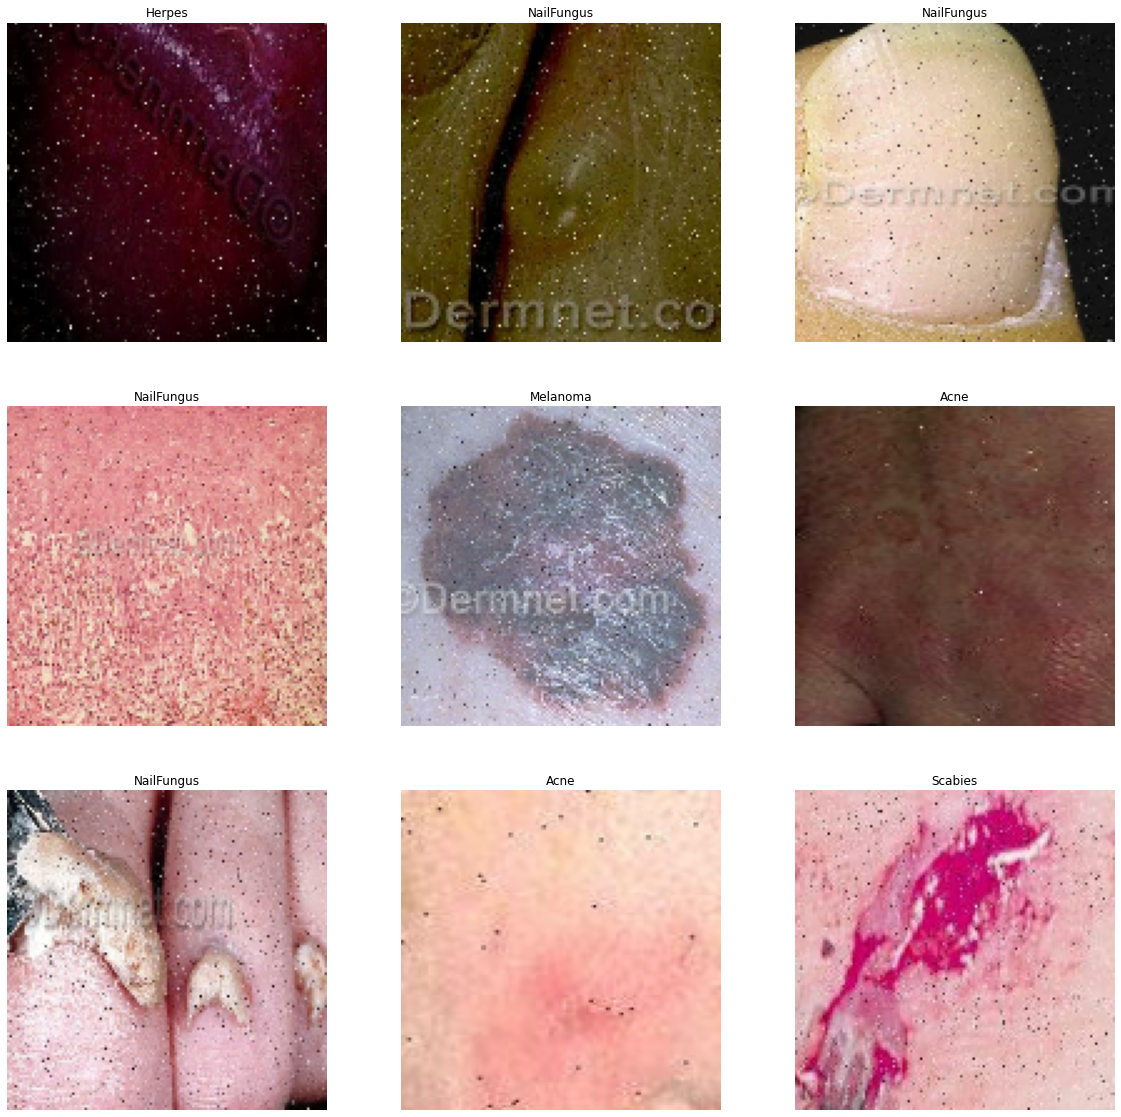

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [23]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(128, 128, 128, 3)
(128,)


In [24]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [25]:
!pip install git+https://github.com/tensorflow/docs 

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-xfa1kvjc
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-xfa1kvjc
  Resolved https://github.com/tensorflow/docs to commit cf5f08d049bfe2988ceb8beccb97b33aa5fc6f43
  Preparing metadata (setup.py) ... - done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=184469 sha256=7d5f3bc0d288e9baa1b066ac1b5a82be8f282a0903677352f44d8f004c83945c
  Stored in directory: /tmp/pip-ephem-wheel-cache-2mkvc0t2/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [26]:
import pathlib
import shutil
import tempfile

logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

In [27]:
METRICS = [
    'accuracy',
    tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, name='CrossEntropyLoss'),
]

In [28]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [29]:
def get_callbacks(name):
    return [
    tfdocs.modeling.EpochDots(report_every=10),
    tf.keras.callbacks.EarlyStopping(monitor='val_CrossEntropyLoss', patience=200),
    tf.keras.callbacks.TensorBoard(logdir/name),
    ]

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [30]:
def get_optimizer():
    return tf.keras.optimizers.Adam(0.001)

In [31]:
def compile_and_fit(model, name, optimizer=None, max_epochs=1000, initial_epoch = 0):
    if optimizer is None:
        optimizer = get_optimizer()
    model.compile(optimizer=optimizer,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=METRICS)

    model.summary()

    history = model.fit(
    train_ds,
    epochs=max_epochs,
    validation_data=val_ds,
    initial_epoch=initial_epoch,
    callbacks=[get_callbacks(name), tf.keras.callbacks.LearningRateScheduler(scheduler)],
    verbose=0
    )
    return history

In [32]:
num_classes = len(class_names)

In [33]:
mirrored_strategy = tf.distribute.MirroredStrategy()
batch_size = 64 * mirrored_strategy.num_replicas_in_sync

In [34]:
# with mirrored_strategy.scope():
#     baseline = Sequential([
#         layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#         data_augmentation,
#         layers.Conv2D(16, 3, padding='same', activation='relu'),
#         layers.MaxPooling2D(),
#         layers.Conv2D(32, 3, padding='same', activation='relu'),
#         layers.MaxPooling2D(),
#         layers.Conv2D(64, 3, padding='same', activation='relu'),
#         layers.MaxPooling2D(),
#         layers.Flatten(),
#         layers.Dropout(0.2),
#         layers.Dense(512, activation='relu'),
#         layers.BatchNormalization(),
#         layers.Dropout(0.2),
#         layers.Dense(256, activation='relu'),
#         layers.BatchNormalization(),
#         layers.Dropout(0.2),
#         layers.Dense(128, activation='relu'),
#         layers.BatchNormalization(),
#         layers.Dropout(0.2),
#         layers.Dense(64, activation='relu'),
#         layers.BatchNormalization(),
#         layers.Dropout(0.2),
#         layers.Dense(num_classes)
#     ])

In [35]:
# model_histories = {}

### Base Model

In [36]:
# !mkdir baseline_model
# %cd baseline_model

In [37]:
# model_histories["baseline_model"] = compile_and_fit(baseline, "BaseModel")

In [38]:
# baseline.save("./")
# baseline.save('baseline.h5')

In [39]:
# %cd ../

### Transfer Learning with (MobileNet V2)

In [40]:
# !mkdir MobileNetV2
# %cd MobileNetV2

In [41]:
# with mirrored_strategy.scope():
#     IMG_SHAPE = (128,128) + (3,)
#     base_model_MobileNetV2 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
#                                                    include_top=False,
#                                                    weights='imagenet',
#                                                    )
#     base_model_MobileNetV2.trainable = False

#     transfer_learning_MobileNetV2 = Sequential([
#         layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#         data_augmentation,
#         base_model_MobileNetV2,
#         tf.keras.layers.GlobalAveragePooling2D(),
#         tf.keras.layers.Dropout(0.2),
#         layers.Dense(num_classes)
#     ])

In [42]:
# model_histories["transferLeraningMobileNetV2"] = compile_and_fit(transfer_learning_MobileNetV2, "TransferLearningMobileNetV2")

In [43]:
# transfer_learning_MobileNetV2.save("./")
# transfer_learning_MobileNetV2.save('MobileNetV2.h5')

In [44]:
# %cd ../

#### FineTuning on MobileNetV2

In [45]:
# !mkdir FineTuning
# %cd FineTuning

In [46]:
# base_model_MobileNetV2.trainable = True

In [47]:
# Let's take a look to see how many layers are in the base model
# print("Number of layers in the base model: ", len(base_model_MobileNetV2.layers))

In [48]:
# # Fine-tune from this layer onwards
# fine_tune_at = 100

# # Freeze all the layers before the `fine_tune_at` layer
# for layer in base_model_MobileNetV2.layers[:fine_tune_at]:
#     layer.trainable = False


In [49]:
# transfer_learning_MobileNetV2.summary()

In [50]:
# model_histories["FineTune"] = compile_and_fit(transfer_learning_MobileNetV2, name="FineTunedMobileNetV2", initial_epoch=len(model_histories["transferLeraningMobileNetV2"].history["loss"]))

In [51]:
# transfer_learning_MobileNetV2.save("./")
# transfer_learning_MobileNetV2.save('MobileNetV2Fine_Tuned.h5')

In [52]:
# cd ../

In [53]:
# plotter = tfdocs.plots.HistoryPlotter(metric = 'binary_crossentropy', smoothing_std=10)
# plotter.plot(model_histories)
# # plt.ylim([0.5, 0.7])

In [54]:
# # importing package
# import matplotlib.pyplot as plt
# import numpy as np

# def make_lst(num):
#     lst = []
#     for i in range(num):
#         lst.append(i+1)
#     return lst
        
# # create data
# x1 = len(model_histories["baseline_model"].history["accuracy"])
# x2 = len(model_histories["transferLeraningMobileNetV2"].history["accuracy"])
# x3 = len(model_histories["FineTune"].history["accuracy"])

# y_base = model_histories["baseline_model"].history["accuracy"]
# y_mobile = model_histories["transferLeraningMobileNetV2"].history["accuracy"]
# y_fine = model_histories["FineTune"].history["accuracy"]


# # plot lines
# plt.plot(make_lst(x1), y_base, label = "Baseline Model")
# plt.plot(make_lst(x2), y_mobile,label = "Mobile Net")
# plt.plot(make_lst(x3), y_fine , label = "Fine Tune")


# plt.legend()
# plt.show()


In [55]:
# importing package
# import matplotlib.pyplot as plt
# import numpy as np

# def make_lst(num):
#     lst = []
#     for i in range(num):
#         lst.append(i+1)
#     return lst
        
# # create data
# x1 = len(model_histories["baseline_model"].history["loss"])
# x2 = len(model_histories["transferLeraningMobileNetV2"].history["loss"])
# x3 = len(model_histories["FineTune"].history["loss"])

# y_base = model_histories["baseline_model"].history["loss"]
# y_mobile = model_histories["transferLeraningMobileNetV2"].history["loss"]
# y_fine = model_histories["FineTune"].history["loss"]


# # plot lines
# plt.plot(make_lst(x1), y_base, label = "Baseline Model")
# plt.plot(make_lst(x2), y_mobile,label = "Mobile Net")
# plt.plot(make_lst(x3), y_fine , label = "Fine Tune")


# plt.legend()
# plt.show()


### Let's try out some External attention and Self Attention models

In [56]:
# !mkdir ExternalAttention
# %cd ExternalAttention

In [57]:
# !pip install -U tensorflow-addons

In [58]:
# import tensorflow_addons as tfa
# import matplotlib.pyplot as plt

In [59]:
weight_decay = 0.0001
learning_rate = 0.001
label_smoothing = 0.1
batch_size = 8
patch_size = 4  # Size of the patches to be extracted from the input images.
IMG_SHAPE = (128, 128, 3)
num_patches = (128 // patch_size) ** 2  # Number of patch
embedding_dim = 32  # Number of hidden units.
mlp_dim = 32
dim_coefficient = 4
num_heads = 2
attention_dropout = 0.2
projection_dropout = 0.2
num_transformer_blocks = 4  # Number of repetitions of the transformer layer

print(f"Patch size: {patch_size} X {patch_size} = {patch_size ** 2} ")
print(f"Patches per image: {num_patches}")

Patch size: 4 X 4 = 16 
Patches per image: 1024


In [60]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.1),
        layers.RandomContrast(factor=0.1),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.

In [61]:
class PatchExtract(layers.Layer):
    def __init__(self, patch_size, **kwargs):
        super(PatchExtract, self).__init__(**kwargs)
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=(1, self.patch_size, self.patch_size, 1),
            strides=(1, self.patch_size, self.patch_size, 1),
            rates=(1, 1, 1, 1),
            padding="VALID",
        )
        patch_dim = patches.shape[-1]
        patch_num = patches.shape[1]
        return tf.reshape(patches, (batch_size, patch_num * patch_num, patch_dim))


class PatchEmbedding(layers.Layer):
    def __init__(self, num_patch, embed_dim, **kwargs):
        super(PatchEmbedding, self).__init__(**kwargs)
        self.num_patch = num_patch
        self.proj = layers.Dense(embed_dim)
        self.pos_embed = layers.Embedding(input_dim=num_patch, output_dim=embed_dim)

    def call(self, patch):
        pos = tf.range(start=0, limit=self.num_patch, delta=1)
        return self.proj(patch) + self.pos_embed(pos)

In [62]:
def external_attention(
    x, dim, num_heads, dim_coefficient=4, attention_dropout=0, projection_dropout=0
):
    _, num_patch, channel = x.shape
    assert dim % num_heads == 0
    num_heads = num_heads * dim_coefficient

    x = layers.Dense(dim * dim_coefficient)(x)
    # create tensor [batch_size, num_patches, num_heads, dim*dim_coefficient//num_heads]
    x = tf.reshape(
        x, shape=(-1, num_patch, num_heads, dim * dim_coefficient // num_heads)
    )
    x = tf.transpose(x, perm=[0, 2, 1, 3])
    # a linear layer M_k
    attn = layers.Dense(dim // dim_coefficient)(x)
    # normalize attention map
    attn = layers.Softmax(axis=2)(attn)
    # dobule-normalization
    attn = attn / (1e-9 + tf.reduce_sum(attn, axis=-1, keepdims=True))
    attn = layers.Dropout(attention_dropout)(attn)
    # a linear layer M_v
    x = layers.Dense(dim * dim_coefficient // num_heads)(attn)
    x = tf.transpose(x, perm=[0, 2, 1, 3])
    x = tf.reshape(x, [-1, num_patch, dim * dim_coefficient])
    # a linear layer to project original dim
    x = layers.Dense(dim)(x)
    x = layers.Dropout(projection_dropout)(x)
    return x

In [63]:
def mlp(x, embedding_dim, mlp_dim, drop_rate=0.2):
    x = layers.Dense(mlp_dim, activation=tf.nn.gelu)(x)
    x = layers.Dropout(drop_rate)(x)
    x = layers.Dense(embedding_dim)(x)
    x = layers.Dropout(drop_rate)(x)
    return x

In [64]:
def transformer_encoder(
    x,
    embedding_dim,
    mlp_dim,
    num_heads,
    dim_coefficient,
    attention_dropout,
    projection_dropout,
    attention_type="external_attention",
):
    residual_1 = x
    x = layers.LayerNormalization(epsilon=1e-5)(x)
    if attention_type == "external_attention":
        x = external_attention(
            x,
            embedding_dim,
            num_heads,
            dim_coefficient,
            attention_dropout,
            projection_dropout,
        )
    elif attention_type == "self_attention":
        x = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embedding_dim, dropout=attention_dropout
        )(x, x)
    x = layers.add([x, residual_1])
    residual_2 = x
    x = layers.LayerNormalization(epsilon=1e-5)(x)
    x = mlp(x, embedding_dim, mlp_dim)
    x = layers.add([x, residual_2])
    return x

In [65]:
def get_model(attention_type="external_attention"):
    with mirrored_strategy.scope():
        inputs = layers.Input(shape=(128, 128, 3))
        # Image augment
        x = data_augmentation(inputs)
        # Extract patches.
        x = PatchExtract(patch_size)(x)
        # Create patch embedding.
        x = PatchEmbedding(num_patches, embedding_dim)(x)
        # Create Transformer block.
        for _ in range(num_transformer_blocks):
            x = transformer_encoder(
                x,
                embedding_dim,
                mlp_dim,
                num_heads,
                dim_coefficient,
                attention_dropout,
                projection_dropout,
                attention_type,
            )

        x = layers.GlobalAvgPool1D()(x)
        outputs = layers.Dense(num_classes, activation="softmax")(x)
        model = keras.Model(inputs=inputs, outputs=outputs)
    return model

#### External Attention

In [66]:
# model_EaNET = get_model(attention_type="external_attention")

In [67]:
# model_histories["history_EaNet"] = compile_and_fit(model_EaNET, "EANET")

In [68]:
# model_EaNET.save("./")
# model_EaNET.save('EANET.h5')

In [69]:
# %cd ../

#### Self Attention

In [70]:
# !mkdir SelfAttention
# %cd SelfAttention

In [71]:
# model_selfAttention= get_model(attention_type="self_attention")

In [72]:
# model_histories["history_self"] = compile_and_fit(model_selfAttention, "selfAttention")

In [73]:
# model_selfAttention.save("./")
# model_selfAttention.save('SelfAttention.h5')

In [74]:
# %cd ../


# CBAM

In [75]:
!mkdir CBAM
%cd CBAM

/kaggle/working/CBAM


In [76]:
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, Input
from tensorflow.keras.layers import Activation, Concatenate, Conv2D, Multiply

# """
# Implementation of CBAM: Convolutional Block Attention Module in the TensorFlow 2.5.
# Paper: https://arxiv.org/pdf/1807.06521
# """
def channel_attention_module(x, ratio=8):
    batch, _, _, channel = x.shape

    ## Shared layers
    l1 = Dense(channel//ratio, activation="relu", use_bias=False)
    l2 = Dense(channel, use_bias=False)

    ## Global Average Pooling
    x1 = GlobalAveragePooling2D()(x)
    x1 = l1(x1)
    x1 = l2(x1)

    ## Global Max Pooling
    x2 = GlobalMaxPooling2D()(x)
    x2 = l1(x2)
    x2 = l2(x2)

    ## Add both the features and pass through sigmoid
    feats = x1 + x2
    feats = Activation("sigmoid")(feats)
    feats = Multiply()([x, feats])

    return feats

def spatial_attention_module(x):
    ## Average Pooling
    x1 = tf.reduce_mean(x, axis=-1)
    x1 = tf.expand_dims(x1, axis=-1)

    ## Max Pooling
    x2 = tf.reduce_max(x, axis=-1)
    x2 = tf.expand_dims(x2, axis=-1)

    ## Concatenat both the features
    feats = Concatenate()([x1, x2])
    ## Conv layer
    feats = Conv2D(1, kernel_size=7, padding="same", activation="sigmoid")(feats)
    feats = Multiply()([x, feats])

    return feats

def CBAM(x):
    x = channel_attention_module(x)
    x = spatial_attention_module(x)
    return x

In [77]:
# CBAM = CBAM_layer()
img_batch, label_batch = next(iter(train_ds))
feature_batch = CBAM(img_batch)
print(feature_batch.shape)

2022-12-02 11:39:13.507034: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 24 of 100
2022-12-02 11:39:23.746816: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 53 of 100
2022-12-02 11:39:25.479621: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.
2022-12-02 11:39:27.225570: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


(128, 128, 128, 3)


In [78]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = (128,128) + (3,)
base_model_MobileNetV2 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet',
                                               )
# image_batch, label_batch = next(iter(train_ds))
# feature_batch = base_model_MobileNetV2 (image_batch)
# print(feature_batch.shape)
base_model_MobileNetV2.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [79]:
import tensorflow as tf
import tensorflow.keras.layers as KL
import tensorflow.keras.models as KM

class CBAM(keras.layers.Layer):
    def __init__(self):
      super(CBAM, self).__init__()


    def channel_attention(self, features: int, reduction: int = 16, name: str = "") -> KM.Model:
        """channel attention model
        Args:
            features (int): number of features for incoming tensor
            reduction (int, optional): Reduction ratio for the MLP to squeeze information across channels. Defaults to 16.
            name (str, optional): Defaults to "".
        Returns:
            KM.Model: channelwise attention appllier model
        """

        input_tensor = KL.Input(shape=(None, None, features))

        # Average pool over a feature map across channels
        avg = tf.reduce_mean(input_tensor, axis=[1, 2], keepdims=True)
        # Max pool over a feature map across channels
        max_pool = tf.reduce_max(input_tensor, axis=[1, 2], keepdims=True)

        # Number of features for middle layer of shared MLP
        reduced_features = int(features // reduction)

        dense1 = KL.Dense(reduced_features)
        avg_reduced = dense1(avg)
        max_reduced = dense1(max_pool)

        dense2 = KL.Dense(features)
        avg_attention = dense2(KL.Activation("relu")(avg_reduced))
        max_attention = dense2(KL.Activation("relu")(max_reduced))

        # Channel-wise attention
        overall_attention = KL.Activation("sigmoid")(avg_attention + max_attention)

        return KM.Model(
            inputs=input_tensor, outputs=input_tensor * overall_attention, name=name
        )


    def spatial_attention(self, 
        features: int, kernel: int = 7, bias: bool = False, name: str = ""
    ) -> KM.Model:
        """spatial attention model
        Args:
            features (int): number of features for incoming tensor
            kernel (int): convolutional kernel size
            bias (bool, optional): whether to use bias in convolutional layer
            name (str, optional): Defaults to "".
        Returns:
            KM.Model: spatial attention appllier model
        """

        input_tensor = KL.Input(shape=(None, None, features))
        # Average pool across channels for a given spatial location
        avg = tf.reduce_mean(input_tensor, axis=[-1], keepdims=True)

        # Max pool across channels for a given spatial location
        max_pool = tf.reduce_max(input_tensor, axis=[-1], keepdims=True)

        concat_pool = tf.concat([avg, max_pool], axis=-1)

        # Attention for spatial locations
        conv = KL.Conv2D(
            1, (kernel, kernel), strides=(1, 1), padding="same", use_bias=bias
        )(concat_pool)
        attention = KL.Activation("sigmoid")(KL.BatchNormalization()(conv))

        return KM.Model(inputs=input_tensor, outputs=input_tensor * attention, name=name)


    def call( self, 
        input_tensor,
    ) -> tf.Tensor:
        out_tensor = self.channel_attention(3, name="" + "chn")(input_tensor)
        
        out_tensor = self.spatial_attention(3, kernel=7, name="" + "spt")(
                out_tensor
            )
        return out_tensor

In [80]:
cbam_block = CBAM()
img_batch, label_batch = next(iter(train_ds))
feature_batch = cbam_block(img_batch)
print(feature_batch.shape)

(128, 128, 128, 3)


In [81]:
inputs = keras.Input(shape=(128,128,3))
x1 = layers.Rescaling(1./255, input_shape=(img_height, img_width, 3))(inputs)
x2 =data_augmentation(x1)
x3 =  cbam_block(x2)
x4 = base_model_MobileNetV2(x3)
x5 = tf.keras.layers.GlobalAveragePooling2D()(x4)
x6 = tf.keras.layers.Dropout(0.2)(x5)
outputs = layers.Dense(num_classes, name="predictions")(x6)
model = keras.Model(inputs=inputs, outputs=outputs)

In [82]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(0.001)

In [83]:
# Prepare the metrics.
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

In [84]:
import time
epochs = 100
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    start_time = time.time()
    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_ds):

        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:

            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            logits = model(x_batch_train, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            loss_value = loss_fn(y_batch_train, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1) * batch_size))
          # Display metrics at the end of each epoch.


            #     train_acc = train_acc_metric.result()
            #     print("Training acc over epoch: %.4f" % (float(train_acc),))

    # Reset training metrics at the end of each epoch

    # Run a validation loop at the end of each epoch.
    for x_batch_val, y_batch_val in val_ds:
        val_logits = model(x_batch_val, training=False)
        # Update val metrics
        val_acc_metric.update_state(y_batch_val, val_logits)
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    print("Validation acc: %.4f" % (float(val_acc),))
    print("Time taken: %.2fs" % (time.time() - start_time))


Start of epoch 0
Training loss (for one batch) at step 0: 2.5395
Seen so far: 8 samples
Validation acc: 0.2962
Time taken: 26.15s

Start of epoch 1
Training loss (for one batch) at step 0: 1.9626
Seen so far: 8 samples
Validation acc: 0.3224
Time taken: 22.54s

Start of epoch 2
Training loss (for one batch) at step 0: 1.8754
Seen so far: 8 samples
Validation acc: 0.3539
Time taken: 22.85s

Start of epoch 3
Training loss (for one batch) at step 0: 1.7512
Seen so far: 8 samples
Validation acc: 0.3591
Time taken: 22.37s

Start of epoch 4
Training loss (for one batch) at step 0: 1.6434
Seen so far: 8 samples
Validation acc: 0.3984
Time taken: 22.54s

Start of epoch 5
Training loss (for one batch) at step 0: 1.6958
Seen so far: 8 samples
Validation acc: 0.3381
Time taken: 22.64s

Start of epoch 6
Training loss (for one batch) at step 0: 1.6667
Seen so far: 8 samples
Validation acc: 0.3761
Time taken: 23.08s

Start of epoch 7
Training loss (for one batch) at step 0: 1.7232
Seen so far: 8 sa

In [85]:
base_model_MobileNetV2.trainable = True
# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model_MobileNetV2.layers[:fine_tune_at]:
    layer.trainable = False

In [86]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 128, 128, 3)       0         
_________________________________________________________________
data_augmentation (Sequentia (None, 128, 128, 3)       7         
_________________________________________________________________
cbam (CBAM)                  (None, 128, 128, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_128 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0     

In [87]:
epochs = 300
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    start_time = time.time()
    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_ds):

        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:

            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            logits = model(x_batch_train, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            loss_value = loss_fn(y_batch_train, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1) * batch_size))
          # Display metrics at the end of each epoch.


            #     train_acc = train_acc_metric.result()
            #     print("Training acc over epoch: %.4f" % (float(train_acc),))

    # Reset training metrics at the end of each epoch

    # Run a validation loop at the end of each epoch.
    for x_batch_val, y_batch_val in val_ds:
        val_logits = model(x_batch_val, training=False)
        # Update val metrics
        val_acc_metric.update_state(y_batch_val, val_logits)
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    print("Validation acc: %.4f" % (float(val_acc),))
    print("Time taken: %.2fs" % (time.time() - start_time))


Start of epoch 0
Training loss (for one batch) at step 0: 5.1618
Seen so far: 8 samples
Validation acc: 0.1311
Time taken: 23.54s

Start of epoch 1
Training loss (for one batch) at step 0: 1.6790
Seen so far: 8 samples
Validation acc: 0.1311
Time taken: 23.60s

Start of epoch 2
Training loss (for one batch) at step 0: 1.7615
Seen so far: 8 samples
Validation acc: 0.1101
Time taken: 23.59s

Start of epoch 3
Training loss (for one batch) at step 0: 1.7189
Seen so far: 8 samples
Validation acc: 0.1101
Time taken: 23.53s

Start of epoch 4
Training loss (for one batch) at step 0: 1.3568
Seen so far: 8 samples
Validation acc: 0.1166
Time taken: 23.31s

Start of epoch 5
Training loss (for one batch) at step 0: 1.3186
Seen so far: 8 samples
Validation acc: 0.1494
Time taken: 23.88s

Start of epoch 6
Training loss (for one batch) at step 0: 1.5097
Seen so far: 8 samples
Validation acc: 0.1573
Time taken: 23.57s

Start of epoch 7
Training loss (for one batch) at step 0: 1.3006
Seen so far: 8 sa

In [88]:
model.save_weights('./CBAM')

In [89]:
!ls

CBAM.data-00000-of-00001  CBAM.index  checkpoint


In [90]:
cd ../

/kaggle/working


In [91]:
!ls

CBAM  __notebook__.ipynb
